In [2]:
import pandas
import sqlalchemy
from matplotlib import pyplot
import seaborn
import sklearn
import warnings

%matplotlib inline

In [3]:
warnings.filterwarnings("ignore")

In [10]:
con = sqlalchemy.create_engine("""sqlite:////Users/noname/Desktop/tester.db""")
data = pandas.read_sql_query("""SELECT * FROM zaif_ticker""", con )
del data["currency_pair"]

In [11]:
data.index = pandas.to_datetime(data.date)

In [12]:
data.tail(10)

,index,amount,currenty_pair,date,price,tid,trade_type
date,,,,,,,
2017-07-04 03:28:04,2,0.0111,btc_jpy,2017-07-04 03:28:04.000000,288150.0,57427201,bid
2017-07-04 03:28:04,3,0.0049,btc_jpy,2017-07-04 03:28:04.000000,288145.0,57427200,ask
2017-07-04 03:28:12,0,0.0004,btc_jpy,2017-07-04 03:28:12.000000,288175.0,57427205,ask
2017-07-04 03:28:10,1,0.0004,btc_jpy,2017-07-04 03:28:10.000000,288185.0,57427204,ask
2017-07-04 03:28:36,0,0.0275,btc_jpy,2017-07-04 03:28:36.000000,288205.0,57427211,ask
2017-07-04 03:28:36,1,0.0095,btc_jpy,2017-07-04 03:28:36.000000,288210.0,57427210,ask
2017-07-04 03:28:36,2,0.1124,btc_jpy,2017-07-04 03:28:36.000000,288210.0,57427209,ask
2017-07-04 03:28:36,3,0.0836,btc_jpy,2017-07-04 03:28:36.000000,288210.0,57427208,ask
2017-07-04 03:28:36,4,0.0329,btc_jpy,2017-07-04 03:28:36.000000,288210.0,57427207,ask


In [13]:
bid_data = data[data.trade_type == "bid"]
ask_data = data[data.trade_type == "ask"]

bid_resampled = bid_data.resample("10s").mean().dropna()
ask_resampled = ask_data.resample("10s").mean().dropna()

In [14]:
bid_resampled.head()

,index,amount,price,tid
date,,,,
2017-07-02 03:07:00,20.0,0.0068,279655.000000,57229992.0
2017-07-02 03:07:20,19.0,0.0317,279620.000000,57229993.0
2017-07-02 03:07:40,13.0,0.0051,279631.666667,57230002.0
2017-07-02 03:07:50,6.0,0.0158,279635.000000,57230010.0
2017-07-02 03:08:50,0.0,0.0183,279725.000000,57230018.0


In [15]:
ask_resampled.head()

,index,amount,price,tid
date,,,,
2017-07-02 03:07:20,18.0,0.0035,279570.0,57229997.0
2017-07-02 03:07:30,17.0,0.0035,279555.0,57229998.0
2017-07-02 03:07:40,11.5,0.0101,279552.5,57230003.5
2017-07-02 03:07:50,6.0,0.0035,279600.0,57230010.0
2017-07-02 03:08:00,4.0,0.0183,279580.0,57230012.0


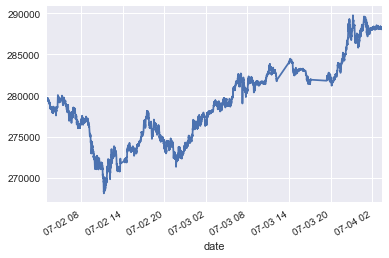

In [18]:
bid_resampled["price"].plot()

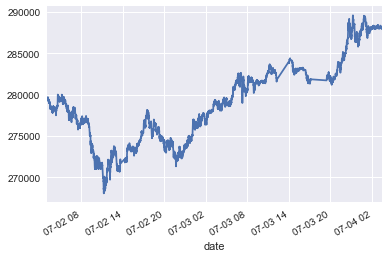

In [19]:
ask_resampled["price"].plot()

In [16]:
price_data  = pandas.concat([bid_resampled["price"], ask_resampled["price"]],axis=1)
price_data.columns = ["bid", "ask"]

spread = price_data["bid"] - price_data["ask"]

spread.describe()

count    11730.000000
mean        50.452126
std         73.294060
min       -477.692308
25%          5.833333
50%         29.069264
75%         76.666667
max       1320.108696
dtype: float64

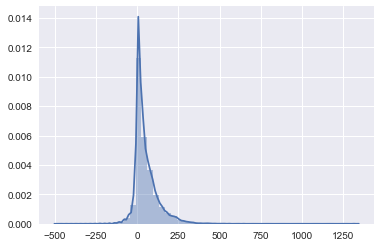

In [36]:
seaborn.distplot(spread.dropna())

((array([-3.84978721, -3.62679567, -3.50447063, ...,  3.50447063,
          3.62679567,  3.84978721]),
  array([-271.02272727, -264.69924812, -242.95454545, ...,  562.38095238,
          608.        ,  645.        ])),
 (65.704764980942485, 50.253083350820646, 0.9194826262586574))

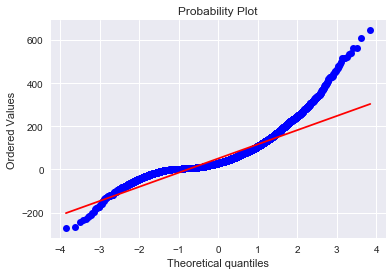

In [62]:
import scipy.stats as stats
import pylab
stats.probplot(out, dist="norm", plot=pylab)

In [60]:
out = spread.dropna()[spread.dropna() < 750][spread.dropna() > -300]

In [61]:
stats.shapiro(out)

(0.8457374572753906, 0.0)

In [44]:
stats.shapiro(spread.dropna())

(0.824232816696167, 0.0)

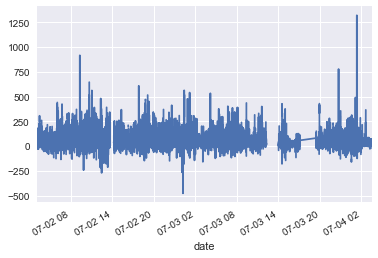

In [20]:
spread.plot()

# 全データ使う

In [21]:
resampled = data.resample("10s").mean().dropna()

In [25]:
# dataset Creation
training_data = resampled["2017-07-02 06:30:00":]
#test_data = resampled["2017-07-02 06:30:00":]

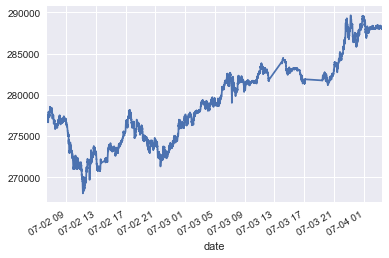

In [26]:
test_data["price"].plot()

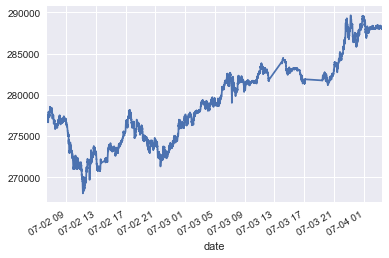

In [27]:
training_data["price"].plot()

In [28]:
rolling_diff_1M = training_data.rolling(6).mean()["price"].diff().dropna()
rolling_diff_5M = training_data.rolling(30).mean()["price"].diff().dropna()
rolling_diff_10M = training_data.rolling(60).mean()["price"].diff().dropna()

In [29]:
rolling_diff_df = pandas.concat([rolling_diff_1M, rolling_diff_5M, rolling_diff_10M], axis=1).dropna()
rolling_diff_df.columns = ["1M", "5M", "10M"]

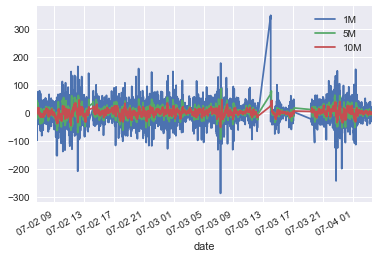

In [30]:
rolling_diff_df.plot()

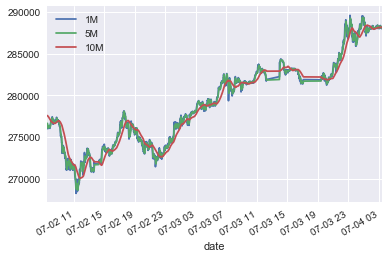

In [34]:
rolling_1M = training_data.rolling(6).mean()["price"].dropna()
rolling_5M = training_data.rolling(30).mean()["price"].dropna()
rolling_10M = training_data.rolling(360).mean()["price"].dropna()

rolling_df = pandas.concat([rolling_1M, rolling_5M, rolling_10M], axis=1).dropna()
rolling_df.columns = ["1M", "5M", "10M"]

rolling_df.plot()

In [ ]:
# Detect Golden Cross / Dead Cross
def golden_detect(latest_3_df: pandas.DataFrame) -> bool:
    """
    >>> df = {'10M': {Timestamp('2017-06-30 16:35:20'): 282846.5542856449,
  Timestamp('2017-06-30 16:35:30'): 282849.31539675605,
  Timestamp('2017-06-30 16:35:40'): 282849.89873008936},
 '1M': {Timestamp('2017-06-30 16:35:20'): 282971.85019841272,
  Timestamp('2017-06-30 16:35:30'): 282930.29464285716,
  Timestamp('2017-06-30 16:35:40'): 282899.52083333331},
 '5M': {Timestamp('2017-06-30 16:35:20'): 282863.28952367074,
  Timestamp('2017-06-30 16:35:30'): 282869.81174589298,
  Timestamp('2017-06-30 16:35:40'): 282871.70222208346}}
    >>> df = pandas.DataFrame.from_dict(df)
    >>> golden_detect(df)
  """
    